#  Customer Classification Project Based on Spending Behavior

## 📌 Project Overview
This project aims to classify customers based on their **financial behavior** and **financial goals**, derived from their **spending**, **saving**, and **volatility patterns**.  
The classification helps businesses better understand customer profiles and design **personalized financial products**, **marketing campaigns**, and **risk management strategies**.

### 🎯 Target Labels:
- **Behavior_Type:**
  - `disciplined`: Consistent and planned spending/saving.
  - `volatile`: Irregular and unpredictable financial behavior.
  - `spender`: Freely spending with little regard to savings.
  - `unclassified`: Ambiguous or mixed financial patterns.

- **Financial_Goal:**
  - `Saver`: Aims to save money consistently.
  - `Investor`: Actively invests money to grow wealth.
  - `Spender`: Prioritizes consumption and lifestyle spending.

---

## 📊 Dataset Description

The dataset includes the following features:

| Column Name           | Description                                               |
|------------------------|-----------------------------------------------------------|
| `Customer_ID`          | Unique identifier for each customer                      |
| `Savings_Rate`         | Proportion of income saved                               |
| `Investment_Rate`      | Proportion of income invested                            |
| `Debt_Ratio`           | Debt-to-income ratio                                     |
| `Spending_Volatility`  | Variation in spending over time                          |
| `Spending_Rate`        | Proportion of income spent                               |
| `Total_Spending`       | Total annual spending                                    |
| `Behavior_Type`        | Labeled financial behavior type                          |
| `Financial_Goal`       | Labeled financial objective                              |

---

## 🔍 Sample Data Preview

| Customer_ID | Savings_Rate | Investment_Rate | Debt_Ratio | Spending_Volatility | Spending_Rate | Total_Spending | Behavior_Type | Financial_Goal |
|-------------|--------------|-----------------|------------|---------------------|---------------|----------------|----------------|----------------|
| CUST1000    | 0.00         | 0.15            | 0.0816     | 1127.96             | 0.8856        | 13018.93       | unclassified   | Investor       |
| CUST1001    | 0.05         | 0.15            | 0.1058     | 598.62              | 0.9213        | 10444.70       | unclassified   | Investor       |
| CUST1002    | 0.00         | 0.00            | 0.0000     | 2371.20             | 0.7497        | 10252.99       | volatile       | Spender        |
| CUST1010    | 0.00         | 0.00            | 0.1487     | 282.00              | 0.9520        | 7680.78        | spender        | Spender        |
| CUST1014    | 0.30         | 0.10            | 0.1307     | 761.74              | 0.9097        | 16010.30       | disciplined    | Investor       |

---

## 🛠️ Methodology

### 1. Data Collection & Cleaning
- Loaded the dataset using `pandas`.
- Handled missing values and outliers.
- Removed irrelevant columns (`Customer_ID`) for modeling.

### 2. Feature Engineering
- Utilized key features: `Savings_Rate`, `Investment_Rate`, `Debt_Ratio`, `Spending_Rate`.
- Developed a custom **Financial Volatility Index**:
  - Calculated as the **standard deviation of monthly balances**.
  - Captures the stability of financial behavior.

### 3. Label Encoding
- Encoded `Behavior_Type` and `Financial_Goal` using `LabelEncoder` for ML compatibility.

### 4. Model Selection
- Tested multiple classifiers:
  - 🌲 **Random Forest**
  - 📉 **Logistic Regression**
  - ⚡ **Gradient Boosting (XGBoost)**
- Used **Stratified 5-Fold Cross-Validation** to ensure robustness (small dataset ≈ 50 rows).

### 5. Model Evaluation
- Evaluated using:
  - Accuracy
  - Precision, Recall
  - F1 Score
  - Confusion Matrix

### 6. Prediction & Deployment
- Trained model can classify new customers based on their financial data.
- Useful in:
  - Real-time dashboards
  - CRM systems
  - Loan approval workflows
  - Financial advisory services

---

## 📈 Future Enhancements

- Add time-series features from monthly statements for richer volatility insights.
- Apply unsupervised clustering for pre-labeling or segmentation.
- Expand data with additional demographics and transaction metadata.
- Integrate into a scalable API using FastAPI or Flask.

---

## ✅ Conclusion

The project successfully demonstrates a framework to **classify customers based on behavioral finance indicators**.  
It provides actionable insights for financial institutions to:
- Segment customers
- Customize products
- Optimize risk and marketing strategies

With more data, the system can evolve into a **smart financial assistant** or **advisor**.



# 1. Data Preprocessing
- Loading data
- Cleaning
- Encoding
- SMOTE or Balancing

In [85]:
# Install required libraries
!pip install -q pandas scikit-learn matplotlib seaborn xgboost lightgbm imbalanced-learn joblib shap gradio

In [86]:
# Import Libraries

# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing and splitting
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Classification models - Basic
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

# Classification models - Advanced
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Handling imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, auc, classification_report, confusion_matrix, make_scorer
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model explanation
import shap

# Model persistence
import joblib

# For interactive dashboard
import gradio as gr

In [87]:
# Load Data
df = pd.read_csv("customer_classification_data.csv")

In [4]:
# Display shape
print(f"\n Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


 Dataset Shape: 50 rows, 9 columns


In [88]:
# Preview data
print("\n First 5 Rows:")
print(df.head())


 First 5 Rows:
  Customer_ID  Savings_Rate  Investment_Rate  Debt_Ratio  Spending_Volatility  \
0    CUST1000          0.00             0.15    0.081627          1127.963236   
1    CUST1001          0.05             0.15    0.105848           598.619274   
2    CUST1002          0.00             0.00    0.000000          2371.200345   
3    CUST1003          0.00             0.20    0.123179          1574.507687   
4    CUST1004          0.00             0.20    0.156767          1242.601960   

   Spending_Rate  Total_Spending Behavior_Type Financial_Goal  
0       0.885581    13018.931667  unclassified       Investor  
1       0.921293    10444.695833  unclassified       Investor  
2       0.749652    10252.994167      volatile        Spender  
3       0.897389    16756.049167  unclassified       Investor  
4       0.802353     9212.619167  unclassified       Investor  


In [89]:
# Info about data types and nulls
print("\n Data Info:")
df.info()


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          50 non-null     object 
 1   Savings_Rate         50 non-null     float64
 2   Investment_Rate      50 non-null     float64
 3   Debt_Ratio           50 non-null     float64
 4   Spending_Volatility  50 non-null     float64
 5   Spending_Rate        50 non-null     float64
 6   Total_Spending       50 non-null     float64
 7   Behavior_Type        50 non-null     object 
 8   Financial_Goal       50 non-null     object 
dtypes: float64(6), object(3)
memory usage: 3.6+ KB


In [90]:
# Summary stats for numerical columns
print("\n Numerical Summary:")
print(df.describe())

# Summary stats for categorical columns
print("\n Categorical Summary:")
print(df.describe(include='object'))

# List of column names
print("\n Column Names:")
print(df.columns.tolist())


 Numerical Summary:
       Savings_Rate  Investment_Rate  Debt_Ratio  Spending_Volatility  \
count     50.000000        50.000000   50.000000            50.000000   
mean       0.070470         0.093997    0.128946          1125.712748   
std        0.102287         0.105141    0.137167           713.898634   
min        0.000000         0.000000    0.000000           265.559355   
25%        0.000000         0.000000    0.000000           612.084622   
50%        0.005156         0.058333    0.102942           930.997888   
75%        0.112500         0.150000    0.160015          1565.486065   
max        0.300000         0.300000    0.559667          3792.014206   

       Spending_Rate  Total_Spending  
count      50.000000       50.000000  
mean        0.860774    14128.112100  
std         0.107713     5754.229410  
min         0.495127     5390.936667  
25%         0.819465    10140.825208  
50%         0.892104    13090.058333  
75%         0.934730    18424.042292  
max      

In [91]:
# Load Monthly Transaction Data (example)
monthly_data = pd.DataFrame({
    'Customer_ID': ['CUST1000']*6 + ['CUST1001']*6,
    'Month': pd.date_range('2024-01-01', periods=6, freq='M').tolist() * 2,
    'Balance': [1000, 1050, 980, 1100, 1200, 1150, 900, 850, 870, 920, 950, 940]
})

# Calculate monthly balance volatility (std dev) per customer
volatility_per_customer = monthly_data.groupby('Customer_ID')['Balance'].std().reset_index()
volatility_per_customer.columns = ['Customer_ID', 'Monthly_Balance_Volatility']

# Merge volatility with main data
df = pd.merge(df, volatility_per_customer, on='Customer_ID', how='left')

# Handle missing Monthly_Balance_Volatility (if any)
df['Monthly_Balance_Volatility'].fillna(0, inplace=True)  # or another strategy

Summary statistics for Spending Volatility in main dataset:
count      50.000000
mean     1125.712748
std       713.898634
min       265.559355
25%       612.084622
50%       930.997888
75%      1565.486065
max      3792.014206
Name: Spending_Volatility, dtype: float64


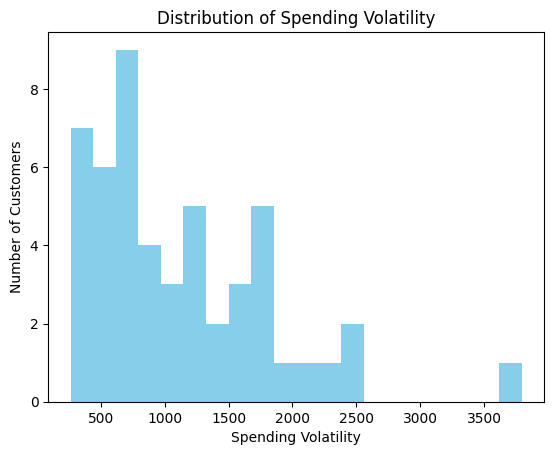


Monthly Balance Volatility per Customer:
  Customer_ID  Monthly_Balance_Volatility
0    CUST1000                   86.023253
1    CUST1001                   39.370039

Merged dataset with new Monthly Balance Volatility feature:
  Customer_ID  Savings_Rate  Investment_Rate  Debt_Ratio  Spending_Volatility  \
0    CUST1000          0.00             0.15    0.081627          1127.963236   
1    CUST1001          0.05             0.15    0.105848           598.619274   
2    CUST1002          0.00             0.00    0.000000          2371.200345   
3    CUST1003          0.00             0.20    0.123179          1574.507687   
4    CUST1004          0.00             0.20    0.156767          1242.601960   

   Spending_Rate  Total_Spending Behavior_Type Financial_Goal  \
0       0.885581    13018.931667  unclassified       Investor   
1       0.921293    10444.695833  unclassified       Investor   
2       0.749652    10252.994167      volatile        Spender   
3       0.897389    1675

In [92]:
# Basic summary stats for the existing Spending Volatility
print("Summary statistics for Spending Volatility in main dataset:")
print(df['Spending_Volatility'].describe())


# Plot histogram of Spending Volatility
plt.hist(df['Spending_Volatility'], bins=20, color='skyblue')
plt.title("Distribution of Spending Volatility")
plt.xlabel("Spending Volatility")
plt.ylabel("Number of Customers")
plt.show()



# --- Step 2: Load monthly transactional data if available ---
# Example monthly data: Customer_ID, Month, and Balance (or monthly spending)
# Replace or load your real monthly data here
monthly_data = pd.DataFrame({
    'Customer_ID': ['CUST1000']*6 + ['CUST1001']*6,
    'Month': pd.date_range('2024-01-01', periods=6, freq='M').tolist() * 2,
    'Balance': [1000, 1050, 980, 1100, 1200, 1150, 900, 850, 870, 920, 950, 940]
})

# Calculate monthly volatility (std deviation) of Balance per customer
volatility_per_customer = monthly_data.groupby('Customer_ID')['Balance'].std().reset_index()
volatility_per_customer.columns = ['Customer_ID', 'Monthly_Balance_Volatility']

print("\nMonthly Balance Volatility per Customer:")
print(volatility_per_customer)


# --- Step 3: Merge the new volatility measure with main data ---
merged_data = pd.merge(df, volatility_per_customer, on='Customer_ID', how='left')

print("\nMerged dataset with new Monthly Balance Volatility feature:")
print(merged_data.head())

In [93]:
# Clean & Normalize Text Columns
print(" Cleaning and normalizing text columns...")
for col in ['Behavior_Type', 'Financial_Goal']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.lower().str.strip()

# Validate Categorical Labels
expected_behavior_types = ['disciplined', 'volatile', 'spender', 'unclassified']
expected_goals = ['saver', 'investor', 'spender']

actual_behavior_types = df['Behavior_Type'].dropna().unique()
actual_goals = df['Financial_Goal'].dropna().unique()

assert set(actual_behavior_types).issubset(set(expected_behavior_types)), \
    f" Unexpected values in Behavior_Type: {set(actual_behavior_types) - set(expected_behavior_types)}"
assert set(actual_goals).issubset(set(expected_goals)), \
    f" Unexpected values in Financial_Goal: {set(actual_goals) - set(expected_goals)}"

print(" Labels validated successfully.")

#  Drop Customer_ID
if 'Customer_ID' in df.columns:
    df.drop(columns=['Customer_ID'], inplace=True)
    print("Dropped Customer_ID column.")


# Handle Missing Values
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    df.fillna(method='ffill', inplace=True)
    print(f" Handled {missing_count} missing values with forward fill.")
else:
    print(" No missing values found.")

 Cleaning and normalizing text columns...
 Labels validated successfully.
Dropped Customer_ID column.
 No missing values found.


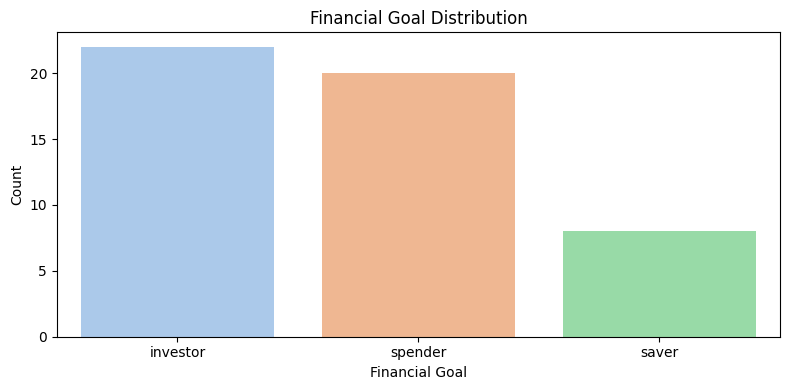

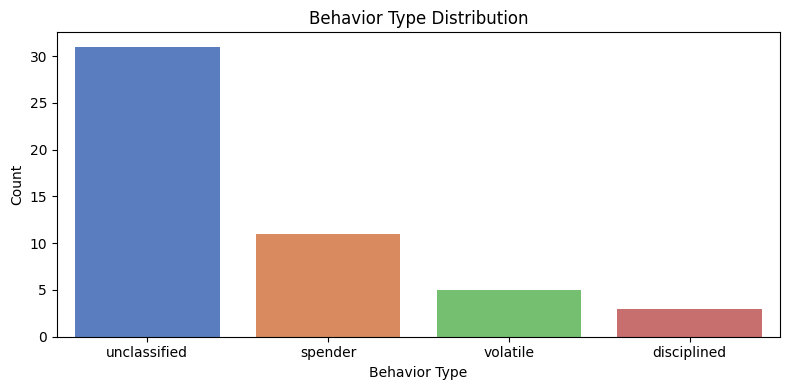

Missing values in numeric features:
 Savings_Rate           0
Investment_Rate        0
Debt_Ratio             0
Spending_Volatility    0
Spending_Rate          0
Total_Spending         0
dtype: int64


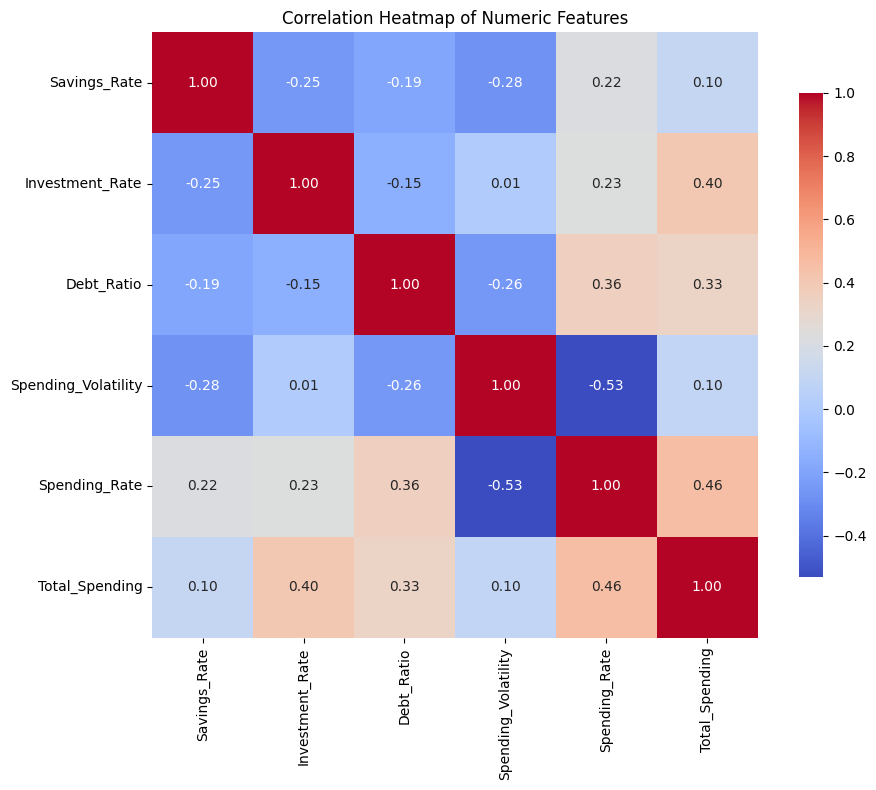

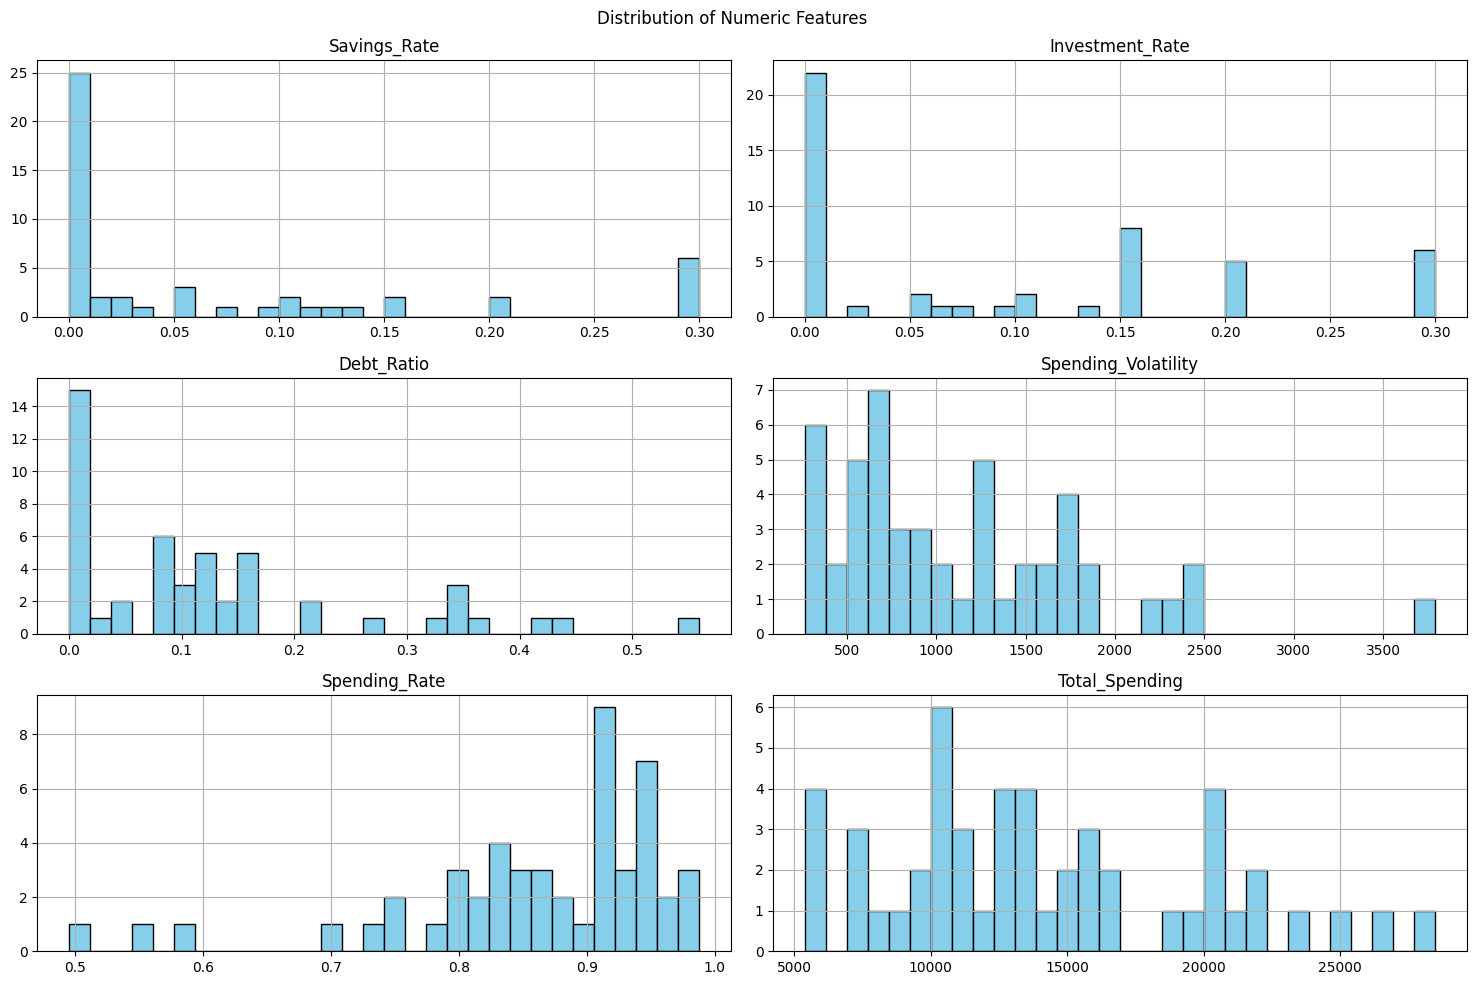

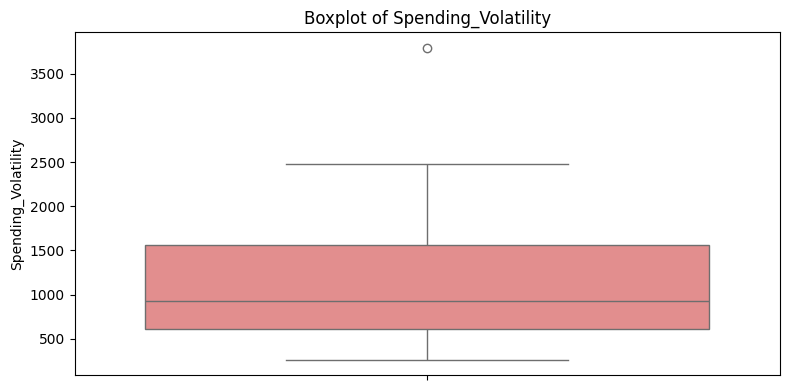

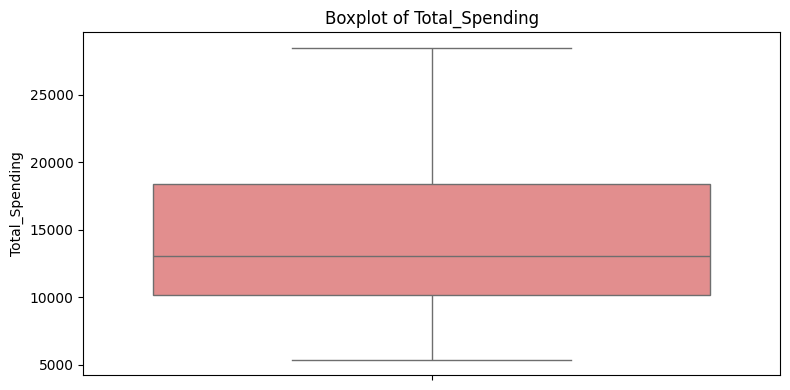

In [94]:
# Exploratory Data Analysis (EDA)

# Distribution of Financial Goals with order by frequency and clear labels
plt.figure(figsize=(8,4))
order_goals = df['Financial_Goal'].value_counts().index
sns.countplot(data=df, x='Financial_Goal', order=order_goals, palette='pastel')
plt.title("Financial Goal Distribution")
plt.xlabel("Financial Goal")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Distribution of Behavior Types with order by frequency and clear labels
plt.figure(figsize=(8,4))
order_behavior = df['Behavior_Type'].value_counts().index
sns.countplot(data=df, x='Behavior_Type', order=order_behavior, palette='muted')
plt.title("Behavior Type Distribution")
plt.xlabel("Behavior Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

feature_cols_basic = ['Savings_Rate', 'Investment_Rate', 'Debt_Ratio',
                      'Spending_Volatility', 'Spending_Rate', 'Total_Spending']

# Check for missing values in numeric features
missing_numeric = df[feature_cols_basic].isnull().sum()
print("Missing values in numeric features:\n", missing_numeric)

# Correlation heatmap with annotations
plt.figure(figsize=(10,8))
corr = df[feature_cols_basic].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# Histogram distribution of numeric features
df[feature_cols_basic].hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots for outlier detection with clear titles
for feature in ['Spending_Volatility', 'Total_Spending']:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, y=feature, color='lightcoral')
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [95]:
# Handle Outliers using Log Transformation

print("Applying log transformation to reduce outlier impact...")
df['Spending_Volatility_Log'] = np.log1p(df['Spending_Volatility'])
df['Total_Spending_Log'] = np.log1p(df['Total_Spending'])
df['Monthly_Balance_Volatility_Log'] = np.log1p(df['Monthly_Balance_Volatility'])

# Use the log-transformed features to detect outliers
for feature in ['Spending_Volatility_Log', 'Total_Spending_Log']:
    mean = df[feature].mean()
    std = df[feature].std()
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std

    # Instead of removing outliers, just warn and check how many rows are outside the limits
    outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
    print(f"Outliers detected in {feature}: {len(outliers)} rows")
    print(outliers[[feature]])

Applying log transformation to reduce outlier impact...
Outliers detected in Spending_Volatility_Log: 0 rows
Empty DataFrame
Columns: [Spending_Volatility_Log]
Index: []
Outliers detected in Total_Spending_Log: 0 rows
Empty DataFrame
Columns: [Total_Spending_Log]
Index: []


In [96]:
# Encoding
label_encoders = {}
for col in ['Behavior_Type', 'Financial_Goal']:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [97]:
# Select Features and Target
feature_cols = ['Savings_Rate', 'Investment_Rate', 'Debt_Ratio',
                'Spending_Volatility_Log', 'Spending_Rate', 'Total_Spending_Log','Monthly_Balance_Volatility_Log',
                'Behavior_Type_Encoded']

X = df[feature_cols]
y = df['Financial_Goal_Encoded']

# Feature Scaling on full dataset (fit and transform together because no train/test split)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example: cross-validate Logistic Regression model

model = LogisticRegression(max_iter=1000, random_state=42)

scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='f1_macro')

print(f"Cross-validated F1 Macro Scores: {scores}")
print(f"Mean F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")


Cross-validated F1 Macro Scores: [0.92207792 0.62962963 0.88571429 0.55555556 1.        ]
Mean F1 Score: 0.7986 (+/- 0.1738)


#  2.  Model Training and Hyperparameter Tuning
- Logistic, RF, Decision Tree, XGBoost, LightGBM
- RandomizedSearch

In [35]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [36]:
# Cross-Validation with SMOTE

results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n Evaluating {name} with Cross-Validation...")

 # Pipeline with SMOTE + model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])

    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='macro', zero_division=0)
    rec = recall_score(y, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y, y_pred, average='macro', zero_division=0)

    print(classification_report(y, y_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    results[name] = {
        'Classification Report': classification_report(y, y_pred, zero_division=0, output_dict=True),
        'Confusion Matrix': confusion_matrix(y, y_pred),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }


 Evaluating Logistic Regression with Cross-Validation...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.50      0.62      0.56         8
           2       0.83      0.75      0.79        20

    accuracy                           0.84        50
   macro avg       0.78      0.79      0.78        50
weighted avg       0.85      0.84      0.84        50

Confusion Matrix:
[[22  0  0]
 [ 0  5  3]
 [ 0  5 15]]
Accuracy: 0.8400, Precision: 0.7778, Recall: 0.7917, F1 Score: 0.7817

 Evaluating Decision Tree with Cross-Validation...
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      1.00      1.00         8
           2       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Con

In [37]:
# Scoring metric: F1 macro to handle multi-class balanced evaluation
scoring = make_scorer(f1_score, average='macro')

In [38]:
# Hyperparameter Tuning with RandomizedSearchCV

# Random Forest Tuningn

# Define parameter grid for Random Forest inside a pipeline
param_rf = {
    'clf__n_estimators': [50, 100, 150],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10]
}

# Build pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', models["Random Forest"])
])

# Hyperparameter tuning using RandomizedSearchCV
rand_rf = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_rf,
    cv=skf,
    scoring=scoring,
    n_iter=10,
    n_jobs=-1,
    random_state=42
)

# Fit search on raw (unscaled) X and y
rand_rf.fit(X, y)

print("Best RF Params:", rand_rf.best_params_)

Best RF Params: {'clf__n_estimators': 50, 'clf__min_samples_split': 5, 'clf__max_depth': 30}


In [39]:
# Hyperparameter Tuning with RandomizedSearchCV
# XGBoost Tuning

param_xgb = {
    'clf__n_estimators': [100, 150, 200],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__subsample': [0.7, 0.8, 1.0]
}

# Pipeline with scaler, SMOTE, and XGBoost classifier
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', models["XGBoost"])
])

# RandomizedSearchCV
rand_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_xgb,
    cv=skf,
    scoring=scoring,
    n_iter=15,
    n_jobs=-1,
    random_state=42
)

# Fit on raw data (X, y) because scaling and SMOTE are inside pipeline
rand_xgb.fit(X, y)

print("Best XGBoost Params:", rand_xgb.best_params_)

Best XGBoost Params: {'clf__subsample': 1.0, 'clf__n_estimators': 100, 'clf__max_depth': 5, 'clf__learning_rate': 0.01}


In [40]:
# Hyperparameter Tuning with RandomizedSearchCV
# LightGBM Tuning

param_lgb = {
    'clf__num_leaves': [31, 50, 70],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [100, 150, 200],
    'clf__max_depth': [-1, 5, 10, 15]
}

# Pipeline with scaler, SMOTE, and LightGBM classifier
lgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', models["LightGBM"])
])

# RandomizedSearchCV
rand_lgb = RandomizedSearchCV(
    lgb_pipeline,
    param_distributions=param_lgb,
    cv=skf,
    scoring=scoring,
    n_iter=15,
    n_jobs=-1,
    random_state=42
)

# Fit on original data
rand_lgb.fit(X, y)

print("Best LightGBM Params:", rand_lgb.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 66, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [43]:
 # Save Tuned Models

tuned_models = {
    "Random Forest": rand_rf.best_estimator_,
    "XGBoost": rand_xgb.best_estimator_,
    "LightGBM": rand_lgb.best_estimator_,
    "Logistic Regression": models["Logistic Regression"],
    "Decision Tree": models["Decision Tree"]
}

# 3. Model Evaluation
- Accuracy
- Confusion Matrix
- Classification Report
- Cross-validation


Training and evaluating Random Forest with Cross-Validation...
Accuracy: 0.9200
Precision (macro): 0.8997
Recall (macro): 0.9348
F1 Score (macro): 0.9127

Classification Report:
              precision    recall  f1-score   support

    investor       0.95      0.95      0.95        22
       saver       0.80      1.00      0.89         8
     spender       0.94      0.85      0.89        20

    accuracy                           0.92        50
   macro avg       0.90      0.93      0.91        50
weighted avg       0.93      0.92      0.92        50

Confusion Matrix:
[[21  0  1]
 [ 0  8  0]
 [ 1  2 17]]


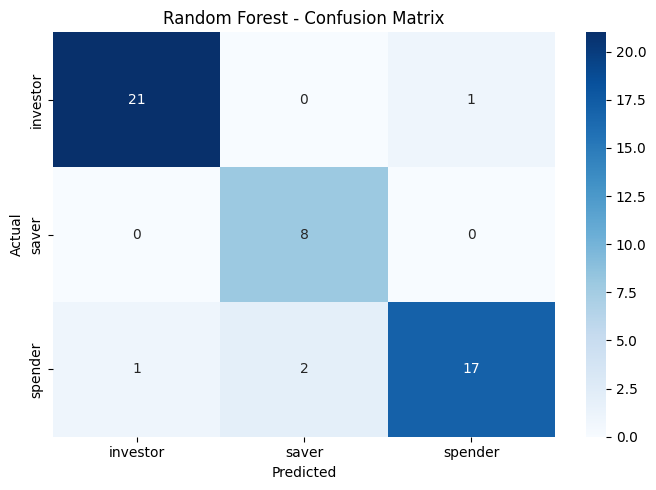


Model Analysis:
 - Model Type: Non-linear
 - Suggestion: Looks strong. Double-check for overfitting or data leakage if accuracy is too perfect.

Training and evaluating XGBoost with Cross-Validation...
Accuracy: 0.9600
Precision (macro): 0.9688
Recall (macro): 0.9417
F1 Score (macro): 0.9537

Classification Report:
              precision    recall  f1-score   support

    investor       0.96      1.00      0.98        22
       saver       1.00      0.88      0.93         8
     spender       0.95      0.95      0.95        20

    accuracy                           0.96        50
   macro avg       0.97      0.94      0.95        50
weighted avg       0.96      0.96      0.96        50

Confusion Matrix:
[[22  0  0]
 [ 0  7  1]
 [ 1  0 19]]


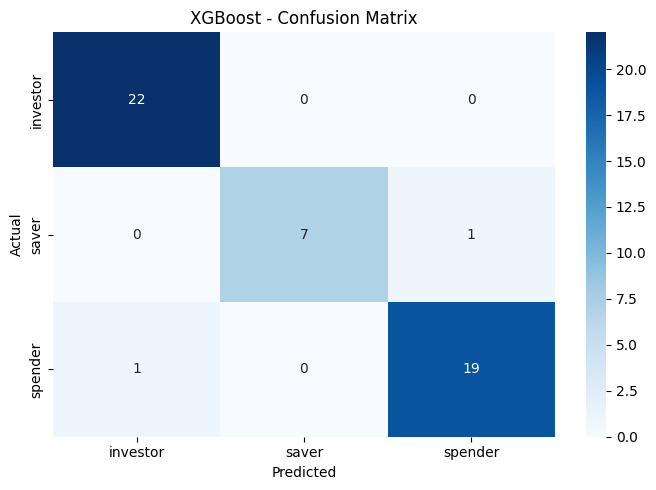


Model Analysis:
 - Model Type: Non-linear
 - Suggestion: Looks strong. Double-check for overfitting or data leakage if accuracy is too perfect.

Training and evaluating LightGBM with Cross-Validation...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

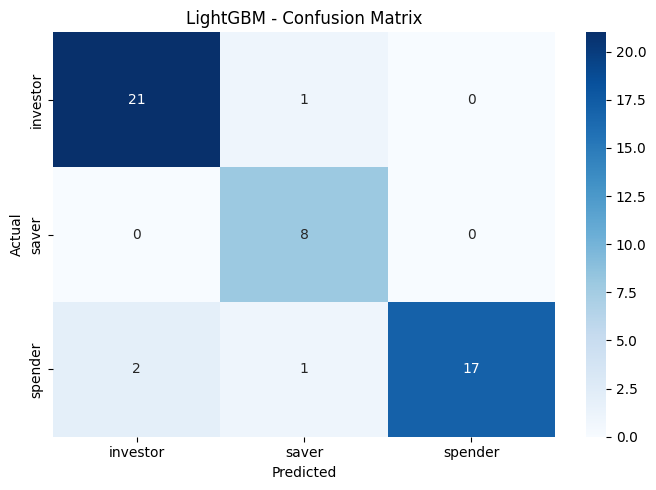


Model Analysis:
 - Model Type: Non-linear
 - Suggestion: Looks strong. Double-check for overfitting or data leakage if accuracy is too perfect.

Training and evaluating Logistic Regression with Cross-Validation...
Accuracy: 0.8400
Precision (macro): 0.7778
Recall (macro): 0.7917
F1 Score (macro): 0.7817

Classification Report:
              precision    recall  f1-score   support

    investor       1.00      1.00      1.00        22
       saver       0.50      0.62      0.56         8
     spender       0.83      0.75      0.79        20

    accuracy                           0.84        50
   macro avg       0.78      0.79      0.78        50
weighted avg       0.85      0.84      0.84        50

Confusion Matrix:
[[22  0  0]
 [ 0  5  3]
 [ 0  5 15]]


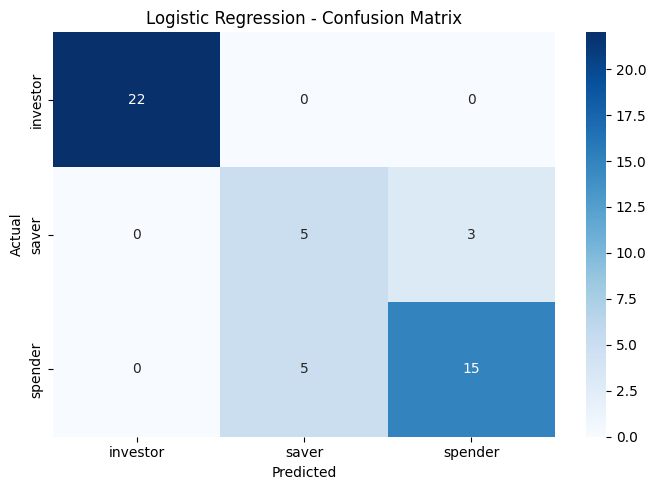


Model Analysis:
 - Model Type: Linear (e.g., Logistic Regression, SVM)
 - Suggestion: Try adding interaction terms, polynomial features, or switching to a tree-based model.

Training and evaluating Decision Tree with Cross-Validation...
Accuracy: 0.9800
Precision (macro): 0.9855
Recall (macro): 0.9833
F1 Score (macro): 0.9840

Classification Report:
              precision    recall  f1-score   support

    investor       0.96      1.00      0.98        22
       saver       1.00      1.00      1.00         8
     spender       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Confusion Matrix:
[[22  0  0]
 [ 0  8  0]
 [ 1  0 19]]


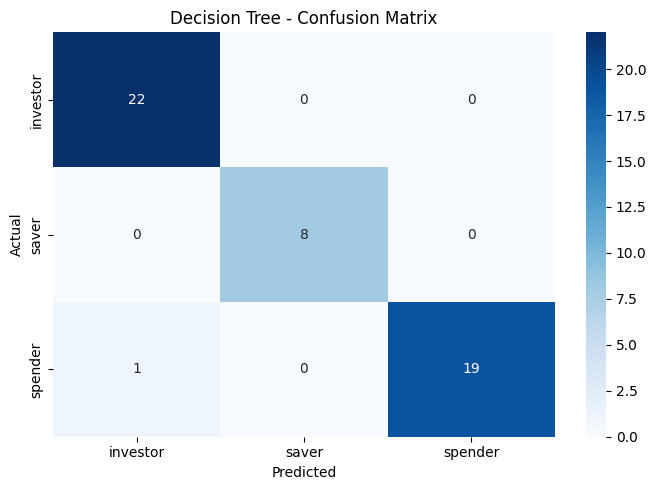


Model Analysis:
 - Model Type: Non-linear
 - Suggestion: Looks strong. Double-check for overfitting or data leakage if accuracy is too perfect.


In [53]:
# Model Evaluation and Analysis using tuned_models (includes tuned and base models)

def model_analysis(model, accuracy):
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    linear_models = (LogisticRegression, SVC)

    print("\nModel Analysis:")

    if isinstance(model, linear_models):
        print(" - Model Type: Linear (e.g., Logistic Regression, SVM)")
        print(" - Suggestion: Try adding interaction terms, polynomial features, or switching to a tree-based model.")
    else:
        print(" - Model Type: Non-linear")
        print(" - Suggestion: Looks strong. Double-check for overfitting or data leakage if accuracy is too perfect.")

    if accuracy == 1.0:
        print(" ** Warning: Accuracy is 1.0 — Check for overfitting or data leakage! **")


results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in tuned_models.items():
    print(f"\nTraining and evaluating {name} with Cross-Validation...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])

    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='macro', zero_division=0)
    rec = recall_score(y, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y, y_pred, average='macro', zero_division=0)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y, y_pred, zero_division=0, target_names=label_encoders['Financial_Goal'].classes_))

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoders['Financial_Goal'].classes_,
                yticklabels=label_encoders['Financial_Goal'].classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    model_analysis(model, acc)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Classification Report': classification_report(y, y_pred, zero_division=0, output_dict=True),
        'Confusion Matrix': cm
    }


Best model based on F1 Score: Decision Tree


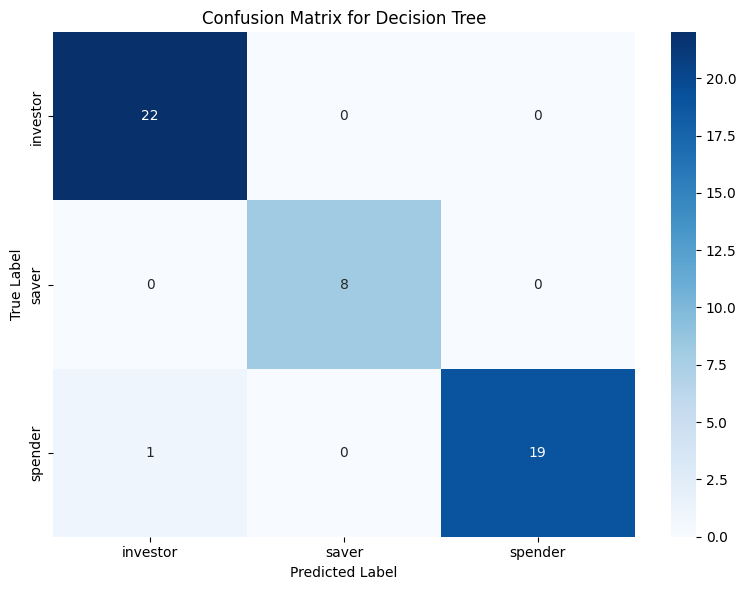


Note:
The confusion matrix above shows the performance of the best model 'Decision Tree'
based on the macro F1 Score obtained from cross-validation.

- Each cell [i, j] represents the number of instances where the true class is 'i'
  and the predicted class is 'j'.
- The diagonal cells indicate correct predictions.
- Off-diagonal cells indicate misclassifications.
- A strong model will have high values along the diagonal and low values elsewhere.

Use this matrix to identify which classes are being confused by the model and
consider further tuning or data collection if necessary.



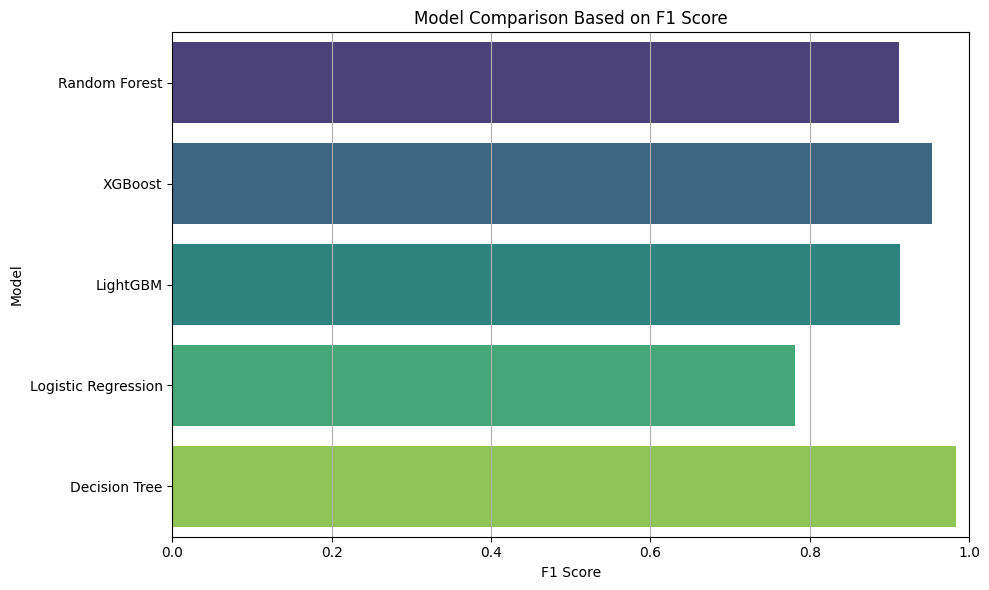

In [54]:
# Select the best model based on F1 Score
best_model_name, best_metrics = max(results.items(), key=lambda x: x[1]['F1 Score'])
best_model = tuned_models[best_model_name]
print(f"\nBest model based on F1 Score: {best_model_name}")

# Plot the Confusion Matrix for the best model
best_cm = results[best_model_name]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Financial_Goal'].classes_,
            yticklabels=label_encoders['Financial_Goal'].classes_)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print(f"""
Note:
The confusion matrix above shows the performance of the best model '{best_model_name}'
based on the macro F1 Score obtained from cross-validation.

- Each cell [i, j] represents the number of instances where the true class is 'i'
  and the predicted class is 'j'.
- The diagonal cells indicate correct predictions.
- Off-diagonal cells indicate misclassifications.
- A strong model will have high values along the diagonal and low values elsewhere.

Use this matrix to identify which classes are being confused by the model and
consider further tuning or data collection if necessary.
""")

# Compare all models based on their F1 Scores
model_names = list(results.keys())
f1_scores = [results[m]['F1 Score'] for m in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores, y=model_names, palette="viridis")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("Model Comparison Based on F1 Score")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [55]:
# Display metrics for each model

for name, metrics in results.items():
    print(f"\n=== {name} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-" * 40)  # separator line for clarity


=== Random Forest ===
Accuracy: 0.9200
Precision: 0.8997
Recall: 0.9348
F1 Score: 0.9127
Confusion Matrix:
[[21  0  1]
 [ 0  8  0]
 [ 1  2 17]]
----------------------------------------

=== XGBoost ===
Accuracy: 0.9600
Precision: 0.9688
Recall: 0.9417
F1 Score: 0.9537
Confusion Matrix:
[[22  0  0]
 [ 0  7  1]
 [ 1  0 19]]
----------------------------------------

=== LightGBM ===
Accuracy: 0.9200
Precision: 0.9043
Recall: 0.9348
F1 Score: 0.9137
Confusion Matrix:
[[21  1  0]
 [ 0  8  0]
 [ 2  1 17]]
----------------------------------------

=== Logistic Regression ===
Accuracy: 0.8400
Precision: 0.7778
Recall: 0.7917
F1 Score: 0.7817
Confusion Matrix:
[[22  0  0]
 [ 0  5  3]
 [ 0  5 15]]
----------------------------------------

=== Decision Tree ===
Accuracy: 0.9800
Precision: 0.9855
Recall: 0.9833
F1 Score: 0.9840
Confusion Matrix:
[[22  0  0]
 [ 0  8  0]
 [ 1  0 19]]
----------------------------------------


In [70]:
# Select the best model from the tuned models
best_model = tuned_models[best_model_name]

# Save the best model pipeline with preprocessing steps
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', best_model)
])

# Train the full pipeline on the entire dataset
best_pipeline.fit(X, y)

# Save the pipeline to a .pkl file
file_name = f"best_model_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(best_pipeline, "best_financial_goal_model.pkl")

print(f"\nBest model pipeline saved as '{file_name}'")


Best model pipeline saved as 'best_model_Decision_Tree.pkl'


#  4. Feature Importance & Explainability
- feature_importances_
- SHAP Analysis


Feature Importance and SHAP Analysis for the best model: Decision Tree


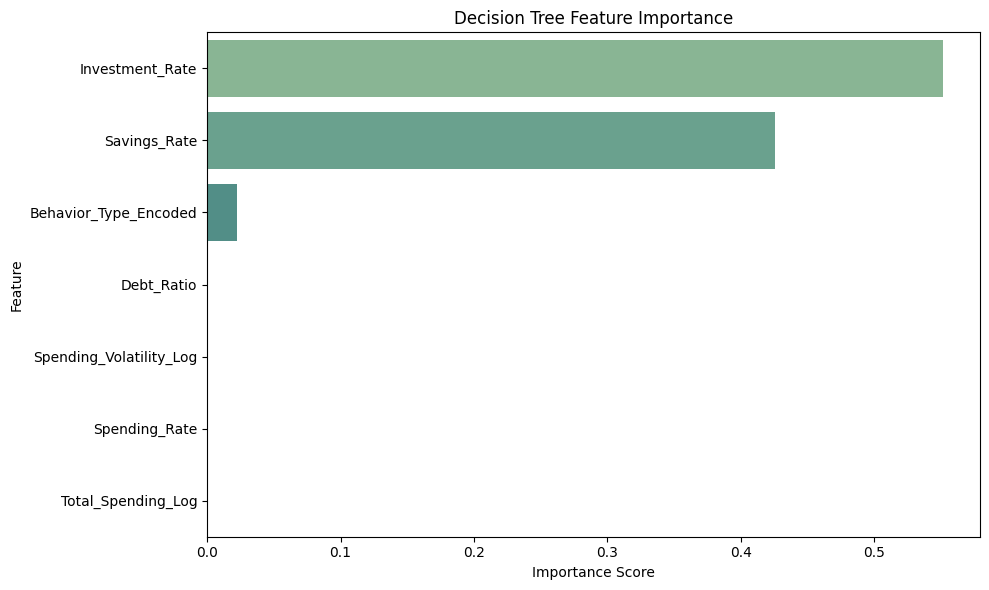

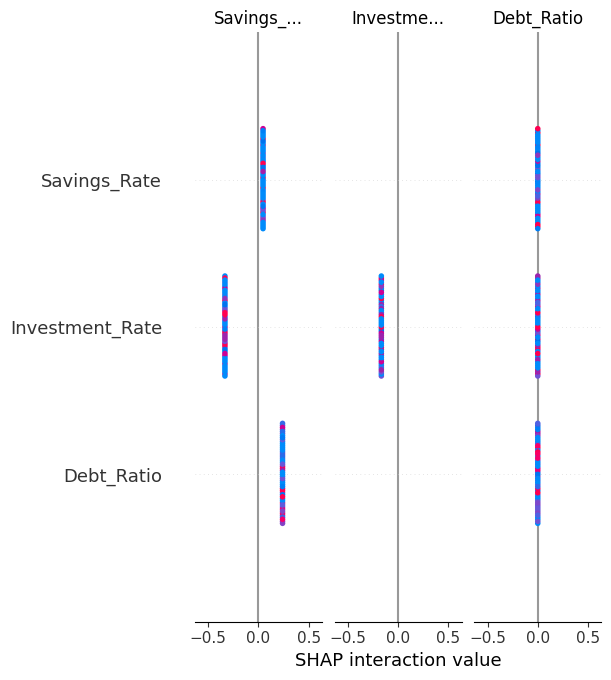

In [71]:
# Feature Importance and Explainability using Feature Importances and SHAP Analysis
print(f"\nFeature Importance and SHAP Analysis for the best model: {best_model_name}")

if best_model_name in ["Random Forest", "XGBoost", "LightGBM", "Decision Tree"]:
    if isinstance(best_model, Pipeline):
        clf = best_model.named_steps['clf']
        # Use scaler if present in pipeline
        if 'scaler' in best_model.named_steps:
            X_for_shap = best_model.named_steps['scaler'].transform(X)
        else:
            X_for_shap = X
    else:
        clf = best_model
        X_for_shap = X  # no scaler available, use raw X

    # Feature Importance plot if exists
    if hasattr(clf, 'feature_importances_'):
        importances = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances.values, y=importances.index, palette='crest')
        plt.title(f"{best_model_name} Feature Importance")
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No feature_importances_ attribute for {best_model_name}")

    # SHAP explainability
    try:
        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_for_shap)
        shap.initjs()
        shap.summary_plot(shap_values, X_for_shap, feature_names=feature_cols)
    except Exception as e:
        print(f"SHAP analysis failed: {e}")

elif best_model_name == "Logistic Regression":
    if isinstance(best_model, Pipeline):
        clf = best_model.named_steps['clf']
        scaler_ = best_model.named_steps.get('scaler', None)
        if scaler_ is not None:
            X_scaled = scaler_.transform(X)
        else:
            X_scaled = X
    else:
        clf = best_model
        X_scaled = X

    clf.fit(X_scaled, y)
    coefs = pd.Series(np.abs(clf.coef_[0]), index=feature_cols).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefs.values, y=coefs.index, palette='magma')
    plt.title("Logistic Regression Feature Importance (Coefficient Magnitude)")
    plt.xlabel("Coefficient Magnitude")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print("\nNote: Coefficients represent strength and direction of linear relationship. Absolute values indicate feature importance.")

else:
    print(f"Feature importance plot and SHAP analysis not implemented for {best_model_name}")

In [74]:
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(feature_cols, "feature_columns.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [75]:
 # Prediction function for new customers

def predict_new_customer(new_data_dict):
    """
    Predicts the financial goal of a new customer based on their financial behavior.

    Parameters:
        new_data_dict (dict): A dictionary with the following keys:
            - "Savings_Rate"
            - "Investment_Rate"
            - "Debt_Ratio"
            - "Spending_Volatility"
            - "Spending_Rate"
            - "Total_Spending"
            - "Behavior_Type" (string)

    Returns:
        str: Predicted Financial Goal (decoded label)
    """

    # Load saved artifacts
    model = joblib.load(f"best_model_{best_model_name.replace(' ', '_')}.pkl")
    label_encoders = joblib.load("label_encoders.pkl")
    feature_cols = joblib.load("feature_columns.pkl")

    # Log transform for Spending_Volatility and Total_Spending
    spending_volatility_log = np.log1p(new_data_dict["Spending_Volatility"])
    total_spending_log = np.log1p(new_data_dict["Total_Spending"])

    # Encode categorical feature
    behavior_encoded = label_encoders["Behavior_Type"].transform([new_data_dict["Behavior_Type"].lower()])[0]

    # Construct input in correct order (assumed order in feature_cols)
    input_list = [
        new_data_dict["Savings_Rate"],
        new_data_dict["Investment_Rate"],
        new_data_dict["Debt_Ratio"],
        spending_volatility_log,
        new_data_dict["Spending_Rate"],
        total_spending_log,
        behavior_encoded
    ]

    input_array = np.array(input_list).reshape(1, -1)

    # Predict based on whether model is pipeline or not
    if hasattr(model, "named_steps"):
        pred_encoded = model.predict(input_array)[0]
    else:
        scaler = joblib.load("scaler.pkl")

        input_scaled = scaler.transform(input_array)
        pred_encoded = model.predict(input_scaled)[0]

    # Decode predicted label
    pred_label = label_encoders["Financial_Goal"].inverse_transform([pred_encoded])[0]

    return pred_label


# Example prediction for new customer
new_customer_example = {
    "Savings_Rate": 0.05,
    "Investment_Rate": 0.10,
    "Debt_Ratio": 0.12,
    "Spending_Volatility": 1100,
    "Spending_Rate": 0.7,
    "Total_Spending": 11500,
    "Behavior_Type": "volatile"
}

print("Predicted financial goal for new customer:", predict_new_customer(new_customer_example))

Predicted financial goal for new customer: investor


#  5. Final Insights and Recommendations

**🧩 Interactive Dashboard**

This section presents an interactive dashboard built with **Gradio**, enabling users to explore and interact with the customer classification model in real time.

**🎯 Purpose**
To provide an intuitive, hands-on interface for testing and visualizing predictions from the trained classification model.

 **⚙️ Key Features**
- Upload or manually input customer financial data (e.g., spending, income, volatility).
- Instantly receive predictions of customer behavior type: **Spender**, **Saver**, or **Investor**.
- View prediction probabilities to better understand confidence levels.
- Simple, user-friendly interface designed for both technical and non-technical users.

 **💡 Business Use Cases**
- Equip financial teams or customer support representatives with tools to assess customer profiles instantly.
- Support data-driven decisions in areas like product targeting, personalized offers, and credit risk assessment.

**📍 Note**
The dashboard is embedded below and can also be deployed as a standalone web application.

In [98]:
# Load saved model artifacts
model = joblib.load("best_financial_goal_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")
feature_cols = joblib.load("feature_columns.pkl")

# Prediction function for Gradio
def predict_new_customer_gradio(
    Savings_Rate,
    Investment_Rate,
    Debt_Ratio,
    Spending_Volatility,
    Spending_Rate,
    Total_Spending,
    Behavior_Type
):
    """
    Receives customer financial data, applies preprocessing, and predicts the financial goal.
    """
    # Log-transform features as per training
    spending_volatility_log = np.log1p(Spending_Volatility)
    total_spending_log = np.log1p(Total_Spending)

    # Encode categorical feature (behavior type), converting input to lowercase
    behavior_encoded = label_encoders["Behavior_Type"].transform([Behavior_Type.lower()])[0]

    # Construct input feature vector matching training order
    input_list = [
        Savings_Rate,
        Investment_Rate,
        Debt_Ratio,
        spending_volatility_log,
        Spending_Rate,
        total_spending_log,
        behavior_encoded
    ]

    # Convert to numpy array and scale
    input_array = np.array(input_list).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predict encoded label, then decode to original label
    pred_encoded = model.predict(input_scaled)[0]
    pred_label = label_encoders["Financial_Goal"].inverse_transform([pred_encoded])[0]

    return f"Predicted Financial Goal: {pred_label.capitalize()}"


#  Behavior type options based on your training data
behavior_options = ["disciplined", "volatile", "spender", "unclassified"]

#  Gradio interface setup
interface = gr.Interface(
    fn=predict_new_customer_gradio,
    inputs=[
        gr.Number(label="Savings Rate (e.g., 0.05)", value=0.05, precision=4),
        gr.Number(label="Investment Rate (e.g., 0.1)", value=0.1, precision=4),
        gr.Number(label="Debt Ratio (e.g., 0.2)", value=0.2, precision=4),
        gr.Number(label="Spending Volatility (e.g., 1100)", value=1100),
        gr.Number(label="Spending Rate (e.g., 0.75)", value=0.75, precision=4),
        gr.Number(label="Total Spending (e.g., 12000)", value=12000),
        gr.Radio(behavior_options, label="Behavior Type", value="disciplined")
    ],
    outputs=gr.Textbox(label="Predicted Financial Goal"),
    title="Customer Financial Goal Prediction",
    description="Input customer financial behavior data to predict their financial goal."
)

# Launch the interface
if __name__ == "__main__":
    interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://937b0e0dc82f807cb3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Recommendations & Business Applications

1. **🎯 Targeted Marketing Campaigns**  
   Leverage predicted financial goals to craft personalized marketing messages, resulting in higher customer engagement and improved conversion rates.

2. **📦 Tailored Product Offerings**  
   Align financial products with customer profiles—e.g., investment portfolios for *Investors*, high-yield savings accounts for *Savers*, and budgeting tools for *Spenders*.

3. **💬 Financial Counseling & Risk Mitigation**  
   Provide customized financial guidance to *Spenders* to encourage responsible spending and reduce potential financial risks.

4. **💳 Credit & Loan Personalization**  
   Use behavioral insights to determine optimal credit limits, interest rates, and loan packages—enhancing risk management and customer satisfaction.

5. **🔁 Customer Retention & Loyalty Programs**  
   Build retention strategies and rewards programs that reflect each customer’s financial behavior, increasing loyalty and lifetime value.